## `Task` Do feature selection as per metods taught is session 54 on SECOM dataset.

Dataset Link : https://archive.ics.uci.edu/ml/datasets/SECOM

Drive Link : https://docs.google.com/spreadsheets/d/1dFCe1zgokabsiEr6BbWmMJtiMefkrChpJWLiG_0dDkk/edit?usp=share_link

In [ ]:
# Write your Code here

### `Solution`

In [ ]:
import pandas as pd

data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = data.drop(columns = 'Time',axis =1)
for i in df.columns:
  df[i] = df[i].fillna(df[i].mean())


In [ ]:
x = df.drop(columns='Pass/Fail',axis =1)
y = df['Pass/Fail']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is:",accuracy)

Accuracy is: 0.9140127388535032


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
temp_df = df.copy()
drop_col = df.columns[temp_df.T.duplicated()]
temp_df.drop(columns=drop_col,inplace = True)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0.01)
sel = var_thres.fit(temp_df)

columns = temp_df.columns[sel.get_support()]
data_vt = sel.transform(temp_df)
data_vt = pd.DataFrame(data_vt,columns=columns)

<Axes: >

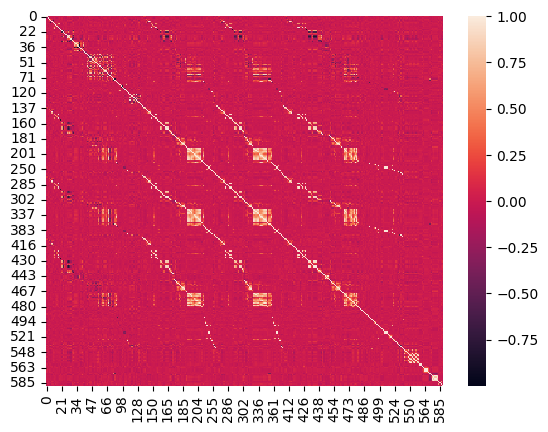

In [ ]:
import seaborn as sns
sns.heatmap(data_vt.corr())

In [ ]:
corr_matrix = data_vt.corr()
del_cols = []
for i in range(len(data_vt.columns)):
  for j in range(i+1,len(data_vt.columns)):
    if abs(corr_matrix.iloc[i,j]>0.8):
      del_cols.append(data_vt.columns[j])

data_vt.drop(columns=del_cols,inplace = True)

In [ ]:
from scipy.stats import f_oneway

alpha = 0.05

column_pvalue = []

for i in data_vt.iloc[:,:-1].columns:
  anova_value = f_oneway(data_vt[i],data_vt['Pass/Fail'])
  #print(f"columns:{i},pvalue:{anova_value.pvalue}")

  if anova_value.pvalue <= alpha:
    column_pvalue.append((i,anova_value.pvalue))

column_pvalue.sort(key = lambda x:x[1])

selected_columns = [column for column, _ in column_pvalue[:100]]

data_anova = data_vt[selected_columns+['Pass/Fail']]

,0,1,2,3,6,12,14,15,16,18,...,225,250,255,268,269,416,417,418,423,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,97.6133,202.439600,7.955800,414.871000,10.043300,192.396300,...,1940.399400,219.9453,0.4269,40.855000,4.515200,2.7380,5.984600,525.096500,53.684000,-1.0
1,3095.78,2465.14,2230.4222,1463.6606,102.3433,200.547000,10.154800,414.734700,9.259900,191.287200,...,1988.000000,193.0287,0.5749,29.743000,3.632700,3.9300,9.060400,0.000000,61.891800,-1.0
2,2932.61,2559.94,2186.4111,1698.0172,95.4878,202.017900,9.515700,416.707500,9.314400,192.703500,...,839.600600,104.4042,0.4166,29.621000,3.913300,3.0609,5.223100,0.000000,50.642500,1.0
3,2988.72,2479.90,2199.0333,909.7926,104.2367,201.848200,9.605200,422.289400,9.692400,192.155700,...,820.399900,94.0954,0.4212,31.830000,3.195900,2.4643,7.660200,317.736200,94.459400,-1.0
4,3032.24,2502.87,2233.3667,1326.5200,100.3967,201.942400,10.566100,420.592500,10.338700,191.603700,...,1406.400400,149.2172,0.4051,19.862000,3.616300,3.3208,4.217800,0.000000,85.225500,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,82.2467,203.986700,11.769200,419.340400,10.239700,193.747000,...,526.100600,54.6842,0.1713,14.205000,3.390700,1.5228,9.460400,708.665700,68.883300,-1.0
1563,3052.31,2522.55,2198.5667,1124.6595,98.4689,204.017300,9.162000,405.817800,10.228500,193.788900,...,406.500000,47.9077,0.3786,24.500000,4.543200,3.2376,7.744400,764.081600,83.224200,-1.0
1564,2978.81,2379.78,2206.3000,1110.4967,99.4122,199.956809,9.005371,413.086035,9.907603,190.047354,...,1089.099600,117.3369,0.3431,19.504677,3.777866,3.5585,8.190905,320.259235,77.660446,-1.0
1565,2894.92,2532.01,2177.0333,1183.7287,98.7978,197.244800,9.735400,401.915300,9.863000,187.381800,...,1041.056588,99.4298,0.4089,21.870000,4.106900,3.2163,8.671700,470.750600,84.773400,-1.0


In [ ]:
# Separate features and target
X = data_anova.drop('Pass/Fail', axis=1)
y = data_anova['Pass/Fail']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=10000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

(1253, 100)
(314, 100)
Test accuracy: 0.910828025477707


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
